In [1]:
# Supervised learning using a feedforward network

In [19]:
# Get and preprocess the data according to our requirement
import pandas as pd
import numpy as np
import torch

# Generate toy data
x = np.linspace(-np.pi, np.pi, 200).reshape(-1,1)
x = x.astype('float32')
y = np.cos(x).reshape(-1,1)
y = y.astype('float32')
x = torch.from_numpy(x)
y = torch.from_numpy(y)
print('Partial view of \n: x: %s, \n y: %s' %(x[0:10,:],y[0:10,:]))

Partial view of 
: x: tensor([[-3.1416],
        [-3.1100],
        [-3.0784],
        [-3.0469],
        [-3.0153],
        [-2.9837],
        [-2.9521],
        [-2.9206],
        [-2.8890],
        [-2.8574]]), 
 y: tensor([[-1.0000],
        [-0.9995],
        [-0.9980],
        [-0.9955],
        [-0.9920],
        [-0.9876],
        [-0.9821],
        [-0.9757],
        [-0.9683],
        [-0.9599]])


In [34]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

torch.manual_seed(78)# Set manual seed 

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 16

In [35]:
# Split the training data in train and test
train_size = int(0.8*len(x))
test_size = len(x)- train_size
x_train, x_test = torch.utils.data.random_split(x, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

# Following is the code for the training network.
class CustomDataset_train(Dataset):
    def __init__(self):
        self.x_train = x_train
        self.y_train = y_train
        self.num_samples = len(x_train)
        
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

    def __len__(self):
        return self.num_samples

class CustomDataset_test(Dataset):

    def __init__(self):
        self.x_test = x_test
        self.y_test = y_test
        self.num_samples = len(x_test)

    def __getitem__(self, index):
        return self.x_test[index], self.y_test[index]

    def __len__(self):
        return self.num_samples

data_train = CustomDataset_train()
data_test = CustomDataset_test()
trainloader = DataLoader(dataset = data_train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset = data_test, batch_size=batch_size, shuffle=True)


In [36]:
import torch.nn as nn
input_size = x.shape[1]
output_size = y.shape[1]

# define network architecture
class myModel(nn.Module):
    def __init__(self,input_dim, output_dim, hidden_size =128):
        super(myModel, self).__init__()
        #define network layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
      
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
model = myModel(input_size, output_size)
print(model)

myModel(
  (fc1): Linear(in_features=1, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [37]:
#define loss function, optimizer and hyperparameters
loss = torch.nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
num_epochs =100
total_step = len(trainloader)

Epoch: 1, overall Loss: 8.277281820774078
Epoch: 2, overall Loss: 7.656789243221283
Epoch: 3, overall Loss: 7.196322649717331
Epoch: 4, overall Loss: 6.7521155178546906
Epoch: 5, overall Loss: 6.434007972478867
Epoch: 6, overall Loss: 6.142618626356125
Epoch: 7, overall Loss: 5.934903025627136
Epoch: 8, overall Loss: 5.767867177724838
Epoch: 9, overall Loss: 5.627138555049896
Epoch: 10, overall Loss: 5.524194777011871
Epoch: 11, overall Loss: 5.453497499227524
Epoch: 12, overall Loss: 5.397998034954071
Epoch: 13, overall Loss: 5.348764628171921
Epoch: 14, overall Loss: 5.31639438867569
Epoch: 15, overall Loss: 5.289619892835617
Epoch: 16, overall Loss: 5.275210291147232
Epoch: 17, overall Loss: 5.270663768053055
Epoch: 18, overall Loss: 5.252311170101166
Epoch: 19, overall Loss: 5.248828828334808
Epoch: 20, overall Loss: 5.241208493709564
Epoch: 21, overall Loss: 5.237889438867569
Epoch: 22, overall Loss: 5.236937522888184
Epoch: 23, overall Loss: 5.234429270029068
Epoch: 24, overall L

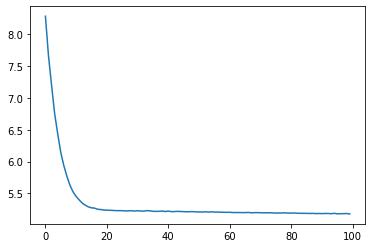

In [38]:
los_list = []
for epoch in range(num_epochs):
    overall_loss = 0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_pred = model(inputs)
        l = loss(y_pred, labels)
        
        # Backward pass and optimize
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        overall_loss += l.item()
        
    print('Epoch: %s, overall Loss: %s'%(epoch+1,overall_loss))
    los_list.append(overall_loss)
    

ep = np.arange(len(los_list))
plt.plot(ep,los_list)

In [42]:
loss_test = []
with torch.no_grad():
    overall_test_loss = 0
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        pred = model(inputs)
        lo = loss(pred, labels)
        overall_test_loss += lo.item()
        print(overall_test_loss)
    loss_test.append(overall_test_loss)

0.44773635268211365
0.9077961146831512
1.2972548305988312
